# Colesterol y Presión Arterial en Pacientes con Enfermedades Cardiovasculares a Partir de los 50 Años: Un Análisis Diferenciado por Sexo

Manu Siddhartha. (2020). Heart Disease Dataset (Comprehensive). IEEE Dataport. https://dx.doi.org/10.21227/dz4t-cm36

Este dataset combina 5 popular datasets populares, donde contiene over 11 columnas con datos sobre enfermedad cardiovascular, permitiendo así su uso para una gran cantidad de estudios de análisis de datos y Machine Learning. Se usan datasets de las siguientes regiones en esta combinación:

Cleveland,
Hungarian,
Switzerland,
Long Beach VA,
Statlog (Heart) Data Set.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

heartdisease = pd.read_csv(r"C:\Users\X\Desktop\Sprint 10 Proyecto\heart_statlog_cleveland_hungary_final.csv")
heartdisease.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [2]:
heartdisease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


Empiezo a realizar cambios de acuerdo a la documentación elaborada por los investigadores que crearon el dataset, adjunta en este mismo repositorio.
Ya que los datos categóricos se encuentran representados con números, prefiero hacer estos cambios para que no exista confusión

Cambio el formato de la variable categórica "sex" de numérico a string 1 = masculino, 0= femenino;

In [3]:
heartdisease['sex'] = heartdisease['sex'].astype(str)
heartdisease['sex'] = heartdisease['sex'].str.replace('0', 'femenino')
heartdisease['sex'] = heartdisease['sex'].str.replace('1', 'masculino')
heartdisease.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,masculino,2,140,289,0,0,172,0,0.0,1,0
1,49,femenino,3,160,180,0,0,156,0,1.0,2,1
2,37,masculino,2,130,283,0,1,98,0,0.0,1,0
3,48,femenino,4,138,214,0,0,108,1,1.5,2,1
4,54,masculino,3,150,195,0,0,122,0,0.0,1,0


Cambio también la variable categórica de tipo de dolor de pecho
-- Valor 1: angina típica
-- Valor 2: angina atípica 
-- Valor 3: dolor no anginoso
-- Valor 4: asintomático

In [4]:
heartdisease['chest pain type'] = heartdisease['chest pain type'].astype(str)
heartdisease['chest pain type'] = heartdisease['chest pain type'].str.replace('1', 'angina típica')
heartdisease['chest pain type'] = heartdisease['chest pain type'].str.replace('2', 'angina atípica')
heartdisease['chest pain type'] = heartdisease['chest pain type'].str.replace('3', 'dolor no anginoso')
heartdisease['chest pain type'] = heartdisease['chest pain type'].str.replace('4', 'asintomático')
heartdisease.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,masculino,angina atípica,140,289,0,0,172,0,0.0,1,0
1,49,femenino,dolor no anginoso,160,180,0,0,156,0,1.0,2,1
2,37,masculino,angina atípica,130,283,0,1,98,0,0.0,1,0
3,48,femenino,asintomático,138,214,0,0,108,1,1.5,2,1
4,54,masculino,dolor no anginoso,150,195,0,0,122,0,0.0,1,0


Cambio la variable categórica de fasting blood sugar, donde se indica si el sujeto de estudio tiene niveles glicémicos que superan los 120 mg/dl en ayuno a Glicemia_Basal_Mayor_120 (1 = verdadero; 0 = falso)

Un nivel de glicemia en ayunas superior a 100 mg/dl puede indicar que existe un riesgo de desarrollar Diabetes tipo 2, lo que puede influir en la salud cardiovascular
https://medlineplus.gov/spanish/ency/article/003482.htm

In [5]:
heartdisease = heartdisease.rename(columns={'fasting blood sugar':'Glicemia_Basal_Mayor_120'})

In [6]:
heartdisease['Glicemia_Basal_Mayor_120'] = heartdisease['Glicemia_Basal_Mayor_120'].astype(str)
heartdisease['Glicemia_Basal_Mayor_120'] = heartdisease['Glicemia_Basal_Mayor_120'].str.replace('0', 'falso')
heartdisease['Glicemia_Basal_Mayor_120'] = heartdisease['Glicemia_Basal_Mayor_120'].str.replace('1', 'verdadero')
heartdisease.head()

,age,sex,chest pain type,resting bp s,cholesterol,Glicemia_Basal_Mayor_120,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,masculino,angina atípica,140,289,falso,0,172,0,0.0,1,0
1,49,femenino,dolor no anginoso,160,180,falso,0,156,0,1.0,2,1
2,37,masculino,angina atípica,130,283,falso,1,98,0,0.0,1,0
3,48,femenino,asintomático,138,214,falso,0,108,1,1.5,2,1
4,54,masculino,dolor no anginoso,150,195,falso,0,122,0,0.0,1,0


Resultados de Electrocardiograma en reposo
--  0: normal
--  1: anormalidad de la onda ST-T(en el electrocardiograma)
--  2: hipertrofia del ventriculo izq probable o definitiva según los Criterios de Romhilt-Estes 


In [7]:
heartdisease['resting ecg'] = heartdisease['resting ecg'].astype(str)
heartdisease['resting ecg'] = heartdisease['resting ecg'].str.replace('0', 'normal')
heartdisease['resting ecg'] = heartdisease['resting ecg'].str.replace('1', 'anormalidad de la onda ST-T')
heartdisease['resting ecg'] = heartdisease['resting ecg'].str.replace('2', 'hipertrofia del ventriculo izq')
heartdisease.head()

,age,sex,chest pain type,resting bp s,cholesterol,Glicemia_Basal_Mayor_120,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,masculino,angina atípica,140,289,falso,normal,172,0,0.0,1,0
1,49,femenino,dolor no anginoso,160,180,falso,normal,156,0,1.0,2,1
2,37,masculino,angina atípica,130,283,falso,anormalidad de la onda ST-T,98,0,0.0,1,0
3,48,femenino,asintomático,138,214,falso,normal,108,1,1.5,2,1
4,54,masculino,dolor no anginoso,150,195,falso,normal,122,0,0.0,1,0


Angina inducida por el ejercicio 1 = si; 0 = no

In [8]:
heartdisease['exercise angina'] = heartdisease['exercise angina'].astype(str)
heartdisease['exercise angina'] = heartdisease['exercise angina'].str.replace('0', 'no')
heartdisease['exercise angina'] = heartdisease['exercise angina'].str.replace('1', 'si')
heartdisease.head()

,age,sex,chest pain type,resting bp s,cholesterol,Glicemia_Basal_Mayor_120,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,masculino,angina atípica,140,289,falso,normal,172,no,0.0,1,0
1,49,femenino,dolor no anginoso,160,180,falso,normal,156,no,1.0,2,1
2,37,masculino,angina atípica,130,283,falso,anormalidad de la onda ST-T,98,no,0.0,1,0
3,48,femenino,asintomático,138,214,falso,normal,108,si,1.5,2,1
4,54,masculino,dolor no anginoso,150,195,falso,normal,122,no,0.0,1,0


Pendiente del segmento ST (visualizado en electrocardiograma) en el pico del ejercicio
-- Value 1: subida
-- Value 2: plano
-- Value 3: bajada

In [9]:
heartdisease['ST slope'] = heartdisease['ST slope'].astype(str)
heartdisease['ST slope'] = heartdisease['ST slope'].str.replace('1', 'subida')
heartdisease['ST slope'] = heartdisease['ST slope'].str.replace('2', 'plano')
heartdisease['ST slope'] = heartdisease['ST slope'].str.replace('3', 'bajada')
heartdisease.head()

,age,sex,chest pain type,resting bp s,cholesterol,Glicemia_Basal_Mayor_120,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,masculino,angina atípica,140,289,falso,normal,172,no,0.0,subida,0
1,49,femenino,dolor no anginoso,160,180,falso,normal,156,no,1.0,plano,1
2,37,masculino,angina atípica,130,283,falso,anormalidad de la onda ST-T,98,no,0.0,subida,0
3,48,femenino,asintomático,138,214,falso,normal,108,si,1.5,plano,1
4,54,masculino,dolor no anginoso,150,195,falso,normal,122,no,0.0,subida,0


target (clasificación de acuerdo a si hay o no diagnóstico de enfermedades cardiovasculares) 1 = enfermedad cardiovascular, 0 = Normal

In [10]:
heartdisease['target'] = heartdisease['target'].astype(str)
heartdisease['target'] = heartdisease['target'].str.replace('0', 'normal')
heartdisease['target'] = heartdisease['target'].str.replace('1', 'enfermedad cardiovascular')
heartdisease.head()

,age,sex,chest pain type,resting bp s,cholesterol,Glicemia_Basal_Mayor_120,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,masculino,angina atípica,140,289,falso,normal,172,no,0.0,subida,normal
1,49,femenino,dolor no anginoso,160,180,falso,normal,156,no,1.0,plano,enfermedad cardiovascular
2,37,masculino,angina atípica,130,283,falso,anormalidad de la onda ST-T,98,no,0.0,subida,normal
3,48,femenino,asintomático,138,214,falso,normal,108,si,1.5,plano,enfermedad cardiovascular
4,54,masculino,dolor no anginoso,150,195,falso,normal,122,no,0.0,subida,normal


In [11]:
heartdisease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       1190 non-null   int64  
 1   sex                       1190 non-null   object 
 2   chest pain type           1190 non-null   object 
 3   resting bp s              1190 non-null   int64  
 4   cholesterol               1190 non-null   int64  
 5   Glicemia_Basal_Mayor_120  1190 non-null   object 
 6   resting ecg               1190 non-null   object 
 7   max heart rate            1190 non-null   int64  
 8   exercise angina           1190 non-null   object 
 9   oldpeak                   1190 non-null   float64
 10  ST slope                  1190 non-null   object 
 11  target                    1190 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 111.7+ KB


Ya que los datos se encuentran en el formato correcto. procedo a renombrar las columnas a su versión en castellano y a cambiar Sexo por Género

In [12]:
heartdisease.rename(columns={
    'age': 'Edad',
    'sex': 'Sexo',
    'chest pain type': 'Tipo_Dolor_Pecho',
    'resting bp s': 'Presion_Arterial_Reposo',
    'cholesterol': 'Colesterol',
    'resting ecg': 'ECG_Reposo',
    'max heart rate': 'Frecuencia_Cardiaca_Max',
    'exercise angina': 'Angina_Ejercicio',
    'oldpeak': 'Depresion_ST',
    'ST slope': 'Pendiente_ST',
    'target': 'Estado'
}, inplace=True)

heartdisease.head()

,Edad,Sexo,Tipo_Dolor_Pecho,Presion_Arterial_Reposo,Colesterol,Glicemia_Basal_Mayor_120,ECG_Reposo,Frecuencia_Cardiaca_Max,Angina_Ejercicio,Depresion_ST,Pendiente_ST,Estado
0,40,masculino,angina atípica,140,289,falso,normal,172,no,0.0,subida,normal
1,49,femenino,dolor no anginoso,160,180,falso,normal,156,no,1.0,plano,enfermedad cardiovascular
2,37,masculino,angina atípica,130,283,falso,anormalidad de la onda ST-T,98,no,0.0,subida,normal
3,48,femenino,asintomático,138,214,falso,normal,108,si,1.5,plano,enfermedad cardiovascular
4,54,masculino,dolor no anginoso,150,195,falso,normal,122,no,0.0,subida,normal


Elimino los duplicados en caso de que existan

In [13]:
heartdisease.drop_duplicates(inplace=True)
heartdisease.shape

(918, 12)

In [14]:
heartdisease.info()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Edad                      918 non-null    int64  
 1   Sexo                      918 non-null    object 
 2   Tipo_Dolor_Pecho          918 non-null    object 
 3   Presion_Arterial_Reposo   918 non-null    int64  
 4   Colesterol                918 non-null    int64  
 5   Glicemia_Basal_Mayor_120  918 non-null    object 
 6   ECG_Reposo                918 non-null    object 
 7   Frecuencia_Cardiaca_Max   918 non-null    int64  
 8   Angina_Ejercicio          918 non-null    object 
 9   Depresion_ST              918 non-null    float64
 10  Pendiente_ST              918 non-null    object 
 11  Estado                    918 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 93.2+ KB


Se observa que de 1.190 registros, quedan 918

Se toma como población de estudio a pacientes que tienen 50 años en adelante, ya que los cambios hormonales en ambos sexos contribuyen a la aparición o aumento de ciertos indicadores de enfermedad cardíaca.
https://www.aarp.org/espanol/salud/vida-saludable/info-2019/enfermedades-del-corazon-despues-de-los-50.html
https://enfermeriaencardiologia.com/salud-cardiovascular/prevencion/factores-de-riesgo

In [15]:
grupo_de_riesgo_df = heartdisease[((heartdisease['Sexo'] == 'femenino') & (heartdisease['Edad'] >= 50)) | 
                                  ((heartdisease['Sexo'] == 'masculino') & (heartdisease['Edad'] >= 50))]

grupo_de_riesgo_df.head()

,Edad,Sexo,Tipo_Dolor_Pecho,Presion_Arterial_Reposo,Colesterol,Glicemia_Basal_Mayor_120,ECG_Reposo,Frecuencia_Cardiaca_Max,Angina_Ejercicio,Depresion_ST,Pendiente_ST,Estado
4,54,masculino,dolor no anginoso,150,195,falso,normal,122,no,0.0,subida,normal
7,54,masculino,angina atípica,110,208,falso,normal,142,no,0.0,subida,normal
11,58,masculino,angina atípica,136,164,falso,anormalidad de la onda ST-T,99,si,2.0,plano,enfermedad cardiovascular
15,54,femenino,angina atípica,120,273,falso,normal,150,no,1.5,plano,normal
18,60,masculino,asintomático,100,248,falso,normal,125,no,1.0,plano,enfermedad cardiovascular


Realizo un describe para conocer las estadísticas de los datos numéricos

In [16]:
grupo_de_riesgo_df.describe()


,Edad,Presion_Arterial_Reposo,Colesterol,Frecuencia_Cardiaca_Max,Depresion_ST
count,627.000000,627.000000,627.000000,627.000000,627.000000
mean,58.690590,135.178628,191.470494,131.199362,1.048485
std,5.873531,18.915821,116.667849,24.090885,1.096353
min,50.000000,0.000000,0.000000,60.000000,-2.000000
25%,54.000000,122.000000,156.500000,115.000000,0.000000
50%,58.000000,134.000000,221.000000,130.000000,1.000000
75%,62.000000,145.000000,267.500000,150.000000,1.800000
max,77.000000,200.000000,603.000000,195.000000,6.200000


### Análisis de la variable "Colesterol"

Primero realizo un plotting de cajas y bigotes para conocer mejor la distribución de registros y saber si existen outliers

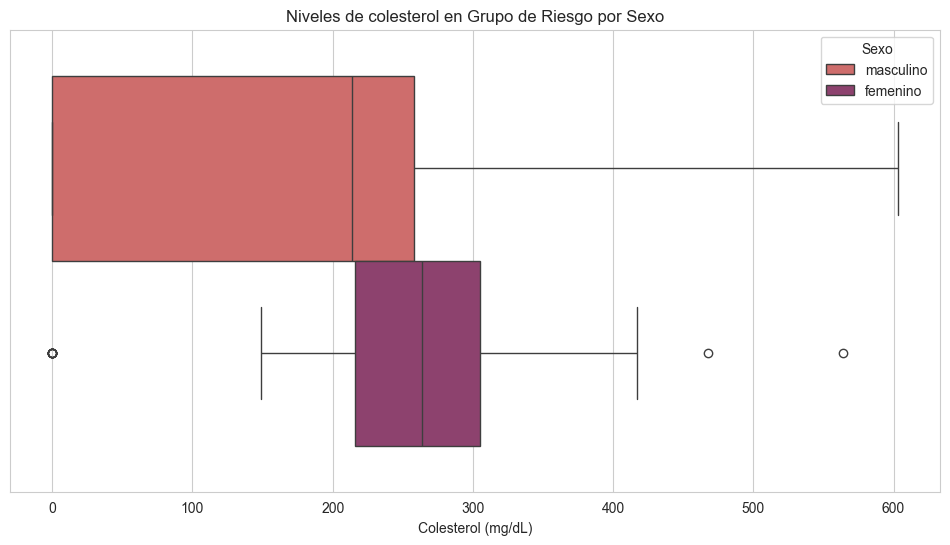

In [17]:
sns.set_style(style="whitegrid")

plt.figure(figsize=(12, 6))

sns.boxplot(data=grupo_de_riesgo_df, x='Colesterol', hue="Sexo", palette="flare")
plt.title('Niveles de colesterol en Grupo de Riesgo por Sexo')
plt.xlabel('Colesterol (mg/dL)')

plt.show()

Reviso los datos del campo correspondiente a niveles de colesterol mediante un describe

In [18]:
grupo_de_riesgo_df["Colesterol"].describe()

count    627.000000
mean     191.470494
std      116.667849
min        0.000000
25%      156.500000
50%      221.000000
75%      267.500000
max      603.000000
Name: Colesterol, dtype: float64

Elimino mediante un filtro los valores inferiores a 120 ya que un ser humano de este rango de edad posee niveles de colesterol total superiores a 120 mg/dl, https://www.medicalnewstoday.com/articles/es/niveles-de-colesterol-por-edad

In [19]:
grupo_de_riesgo_df = grupo_de_riesgo_df[grupo_de_riesgo_df['Colesterol'] > 120]
grupo_de_riesgo_df.describe()

,Edad,Presion_Arterial_Reposo,Colesterol,Frecuencia_Cardiaca_Max,Depresion_ST
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,58.479167,136.179167,249.050000,134.825000,1.093542
std,5.885439,17.375900,59.268625,23.018523,1.116782
min,50.000000,94.000000,123.000000,69.000000,0.000000
25%,54.000000,125.000000,211.000000,118.000000,0.000000
50%,58.000000,135.000000,240.000000,136.000000,1.000000
75%,62.000000,145.000000,282.000000,152.000000,1.800000
max,77.000000,200.000000,603.000000,195.000000,6.200000


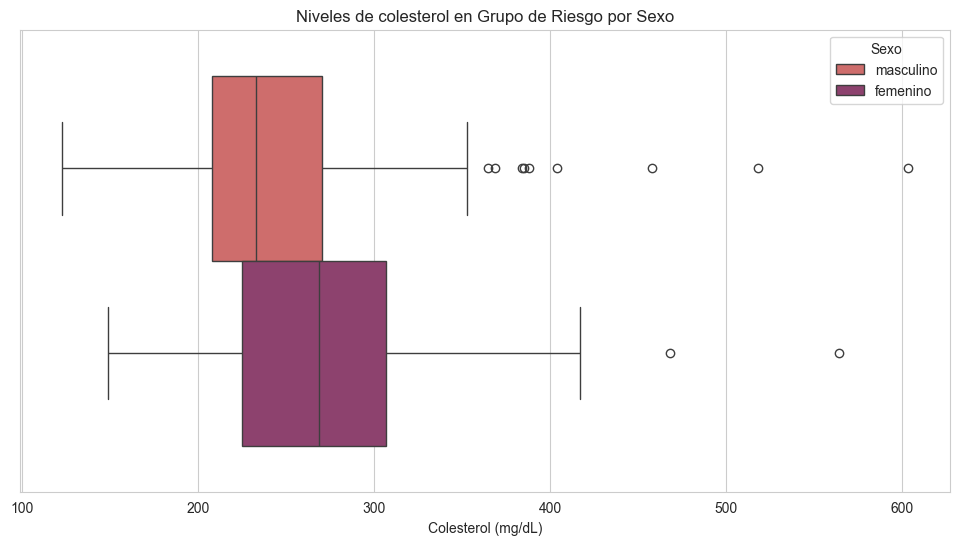

In [20]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=grupo_de_riesgo_df, x='Colesterol', hue="Sexo", palette="flare")
plt.title('Niveles de colesterol en Grupo de Riesgo por Sexo')
plt.xlabel('Colesterol (mg/dL)')

plt.show()


Tras revisar los datos, se observa que los niveles de colesterol son muy altos en la población de estudio, cosa que se debe a que la población de estudio tiene ya diagnosticada o cumple con algunos criterios para el diagnóstico de enfermedades cardiovasculares, por lo cual existe un sesgo que se manejará como tal a lo largo de esta investigación

# Reconocimiento del tipo de distribución de la población de estudio según la variable Colesterol

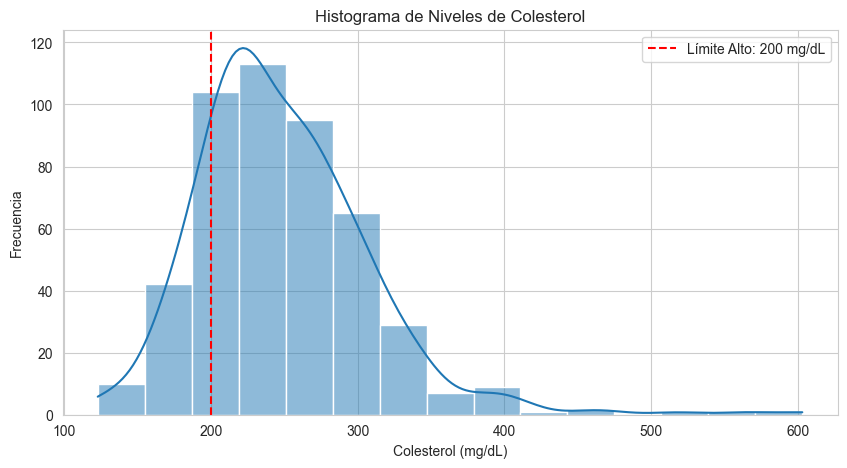

In [21]:
plt.figure(figsize=(10, 5))
sns.histplot(grupo_de_riesgo_df['Colesterol'], bins=15, kde=True)
plt.title('Histograma de Niveles de Colesterol')
plt.xlabel('Colesterol (mg/dL)')
plt.ylabel('Frecuencia')
plt.axvline(x=200, color='r', linestyle='--', label='Límite Alto: 200 mg/dL')
plt.legend()
plt.show()

Con este gráfico se observa que no existe una distribución normal en el dataset, por lo que con pandas se calcula la asimetría 

In [22]:
asimetria = grupo_de_riesgo_df['Colesterol']

# Calcular asimetría con pandas
skewness_pd = asimetria.skew()
print("Asimetría:", skewness_pd)


Asimetría: 1.392750523951329


Ya que es mayor que 1, se considera fuertemente sesgada:
Un valor positivo indica sesgo a la derecha (colas largas en el extremo superior), tal y como se observa en el histograma.

In [23]:
# Prueba de Shapiro-Wilk
stat, p_value = shapiro(asimetria)
print("Shapiro-Wilk Test:")
print("Statistic:", stat, "P-value:", p_value)

Shapiro-Wilk Test:
Statistic: 0.9250930953630504 P-value: 9.728515075658714e-15


El resultado es mucho menor que el nivel de significancia común de 0.05. Esto significa que es muy poco probable que estos datos sigan una distribución normal.

# Identificación de outliers de una distribución altamente sesgada

Ajusté el IQR a 1.0 en lugar de 1.5 porque trabajo con datos altamente variables y porque en este dataset tengo una valores extremos que no debo eliminar del estudio ya que siguen teniendo sentido e importancia. Este ajuste permite filtrar datos más específicos y reducir el número de outliers considerados, que podría ser apropiado para conjuntos de datos no normalmente distribuidos o con distribuciones altamente sesgadas, como es el caso. 
https://fastercapital.com/es/contenido/Asimetria-de-datos--asimetria-de-datos-y-IQR--una-historia-de-asimetria.html

In [24]:
Q1 = grupo_de_riesgo_df['Colesterol'].quantile(0.25)
Q3 = grupo_de_riesgo_df['Colesterol'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.0 * IQR
limite_superior = Q3 + 1.0 * IQR

In [25]:
grupo_sin_outliers = grupo_de_riesgo_df[(grupo_de_riesgo_df['Colesterol'] >= limite_inferior) & 
                                         (grupo_de_riesgo_df['Colesterol'] <= limite_superior)]
grupo_sin_outliers['Colesterol'].describe()

count    454.000000
mean     243.605727
std       44.804270
min      149.000000
25%      211.000000
50%      238.500000
75%      274.750000
max      353.000000
Name: Colesterol, dtype: float64

- El valor medio del colesterol en la población en conjunto es de 243.6 mg/dL
- La desviación estándar es de 44.8 mg/dL, lo que indica que existe una variabilidad considerable en los niveles de colesterol, con algunos individuos teniendo valores mucho más altos o más bajos que la media.
- El valor mínimo de colesterol observado es de 149 mg/dL.
- El primer cuartil (Q1) es 211 mg/dL, el 25% de los individuos tienen un nivel de colesterol igual o inferior a 211 mg/dL.
- La mediana (Q2) es 238.5 mg/dL, la mitad de los individuos tienen un nivel de colesterol igual o inferior a este valor.
- El tercer cuartil (Q3) es 274.75 mg/dL. El 75% de los individuos tienen un nivel de colesterol igual o inferior a este valor.
- El valor máximo de colesterol observado es de 353 mg/dL.

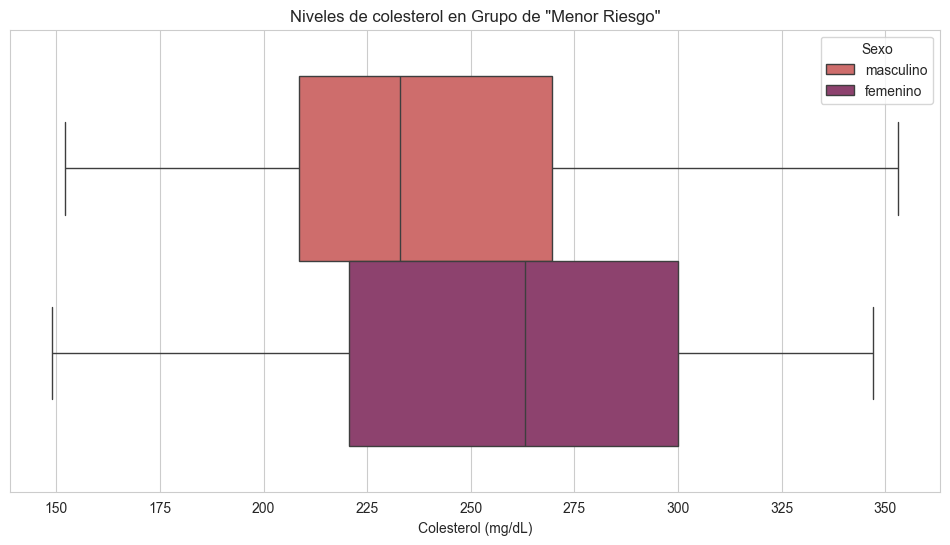

In [26]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=grupo_sin_outliers, x='Colesterol', hue="Sexo", palette="flare")
plt.title('Niveles de colesterol en Grupo de "Menor Riesgo"')
plt.xlabel('Colesterol (mg/dL)')

plt.show()

Hago un describe para poder discriminar de acuerdo al sexo y poder analizar este gráfico con mayor facilidad

In [27]:
descriptive_stats_by_sexo = grupo_sin_outliers.groupby('Sexo')['Colesterol'].describe()
descriptive_stats_by_sexo

,count,mean,std,min,25%,50%,75%,max
Sexo,,,,,,,,
femenino,103.0,259.174757,47.289975,149.0,220.5,263.0,300.0,347.0
masculino,351.0,239.037037,43.060174,152.0,208.5,233.0,269.5,353.0


Comparando ambos sexos:

- La media de colesterol en las mujeres (259.17 mg/dL) es ligeramente superior a la de los hombres (239.04 mg/dL).
- La desviación estándar es similar en ambos grupos, aunque un poco mayor en las mujeres (47.29 vs. 43.06). Esto indica una variabilidad ligeramente mayor en los niveles de colesterol en las mujeres.
- El rango de valores de colesterol es más amplio en los hombres (152 a 353 mg/dL) que en las mujeres (149 a 347 mg/dL).

Hay una diferencia notable en el número de individuos en cada grupo: 103 mujeres frente a 351 hombres. Esto puede influir en la representatividad de las estadísticas.

Observando los percentiles, se puede ver que la distribución del colesterol en las mujeres está ligeramente desplazada hacia valores más altos en comparación con los hombres.

# Análisis de la variable "Presión Arterial Sistólica"

En el dataset solo se encuentra la presión arterial sistólica ya que esta es una medición importante entre los factores de riesgo a evaluar para realizar el diagnóstico de enfermedades cardiovasculares en individuos con edad mayor a 50 años
https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings

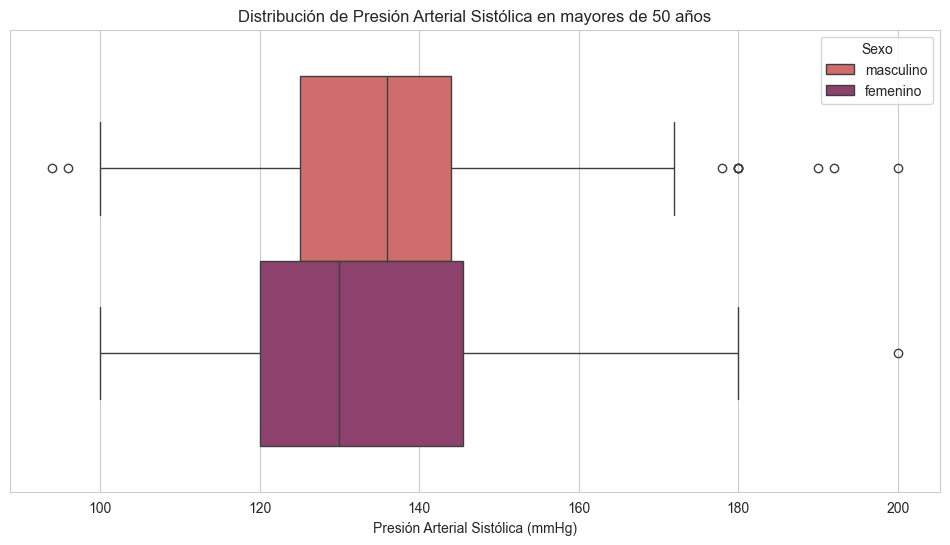

In [28]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=grupo_sin_outliers, x='Presion_Arterial_Reposo', hue="Sexo", palette="flare")
plt.title('Distribución de Presión Arterial Sistólica en mayores de 50 años')
plt.xlabel('Presión Arterial Sistólica (mmHg)')

plt.show()

In [29]:
grupo_de_riesgo_df["Presion_Arterial_Reposo"].describe()

count    480.000000
mean     136.179167
std       17.375900
min       94.000000
25%      125.000000
50%      135.000000
75%      145.000000
max      200.000000
Name: Presion_Arterial_Reposo, dtype: float64

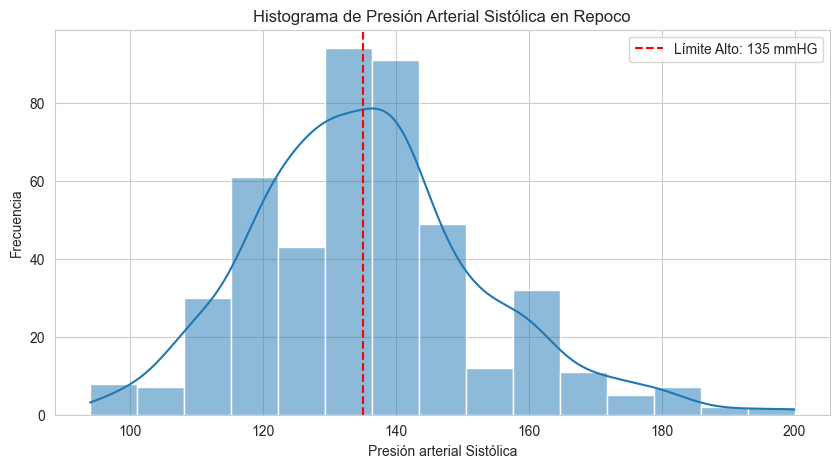

In [30]:
plt.figure(figsize=(10, 5))
sns.histplot(grupo_sin_outliers["Presion_Arterial_Reposo"], bins=15, kde=True)
plt.title('Histograma de Presión Arterial Sistólica en Repoco')
plt.xlabel('Presión arterial Sistólica')
plt.ylabel('Frecuencia')
plt.axvline(x=135, color='r', linestyle='--', label='Límite Alto: 135 mmHG')
plt.legend()
plt.show()

In [31]:
# análisis de asimetría de Presión Arterial Sistólica en Reposo
data = grupo_sin_outliers["Presion_Arterial_Reposo"]

skewness_pd = data.skew()
print("Asimetría:", skewness_pd)


Asimetría: 0.5965969557724164


Asimetría positiva moderada: Aunque la distribución se inclina hacia valores más altos, la asimetría no es extremadamente pronunciada

In [32]:
Q1 = grupo_de_riesgo_df['Presion_Arterial_Reposo'].quantile(0.25)
Q3 = grupo_de_riesgo_df['Presion_Arterial_Reposo'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.4 * IQR
limite_superior = Q3 + 1.4 * IQR

grupo_sin_outliers = grupo_de_riesgo_df[(grupo_de_riesgo_df['Presion_Arterial_Reposo'] >= limite_inferior) & 
                                         (grupo_de_riesgo_df['Presion_Arterial_Reposo'] <= limite_superior)]
grupo_sin_outliers['Presion_Arterial_Reposo'].describe()


count    463.000000
mean     134.825054
std       15.142100
min      100.000000
25%      124.000000
50%      135.000000
75%      143.000000
max      172.000000
Name: Presion_Arterial_Reposo, dtype: float64

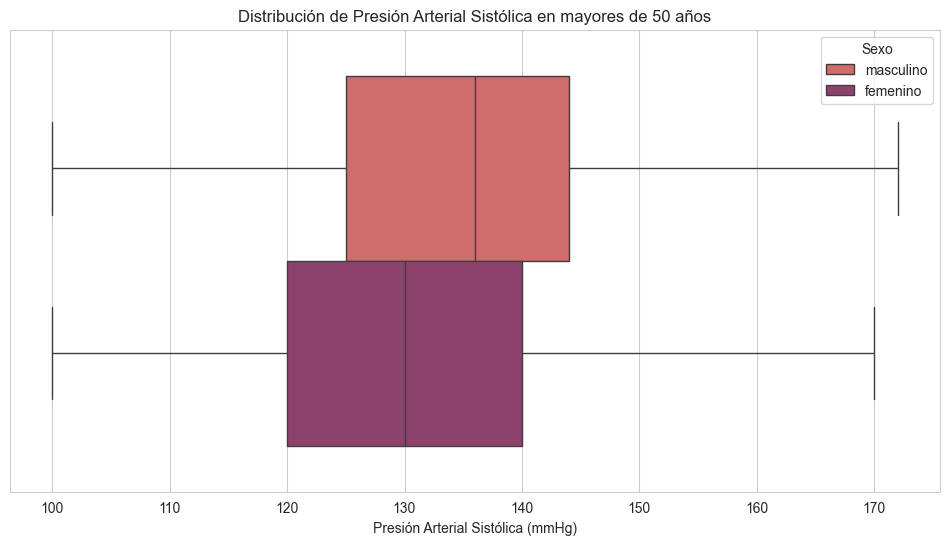

In [33]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=grupo_sin_outliers, x='Presion_Arterial_Reposo', hue="Sexo", palette="flare")
plt.title('Distribución de Presión Arterial Sistólica en mayores de 50 años')
plt.xlabel('Presión Arterial Sistólica (mmHg)')

plt.show()

- La mediana de la presión arterial sistólica es más alta en hombres que en mujeres.
- La dispersión de los datos (representada por la longitud de las cajas) parece ser similar en ambos sexos.
- El rango de valores de presión arterial sistólica parece ser más amplio en hombres.

In [34]:
descriptive_stats_PAS_sexo = grupo_sin_outliers.groupby('Sexo')['Presion_Arterial_Reposo'].describe()
descriptive_stats_PAS_sexo 

,count,mean,std,min,25%,50%,75%,max
Sexo,,,,,,,,
femenino,106.0,132.745283,15.239711,100.0,120.0,130.0,140.0,170.0
masculino,357.0,135.442577,15.079198,100.0,125.0,136.0,144.0,172.0


- La media de la presión arterial sistólica es ligeramente mayor en hombres (135.44 mmHg) que en mujeres (132.75 mmHg).
- La desviación estándar es muy similar en ambos grupos (alrededor de 15), lo que indica una variabilidad similar en los niveles de presión arterial sistólica.
- El rango de valores es ligeramente más amplio en hombres (100 a 172 mmHg) que en mujeres (100 a 170 mmHg).
- Observando los percentiles, se puede confirmar que la distribución de la presión arterial sistólica en hombres está ligeramente desplazada hacia valores más altos en comparación con las mujeres.

In [35]:
# Ahora que tenemos el fichero limpio, crearemos un fichero CSV que será el que usemos para cargar en Power BI.

grupo_sin_outliers.to_csv(r"C:\Users\X\Desktop\Sprint 10 Proyecto\enfermedadcard.csv",sep=",", index=False)

In [37]:
# Calcular la correlación entre presión arterial y colesterol
correlation = grupo_sin_outliers['Presion_Arterial_Reposo'].corr(grupo_sin_outliers['Colesterol'])
print("Correlación entre Presión Arterial y Colesterol:", correlation)

Correlación entre Presión Arterial y Colesterol: 0.00543622898735004


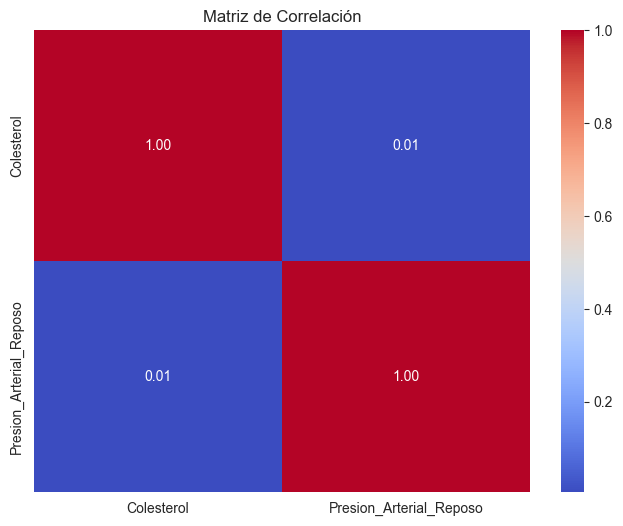

In [43]:
# Calcular la matriz de correlación
correlacion = grupo_sin_outliers[['Colesterol', 'Presion_Arterial_Reposo']].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

